# Dependencies loading

In [1]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning

np.random.seed(2024)
pd.set_option("display.max_columns", 500)

# Data loading

In [2]:
data = pd.read_csv('input_data/X_train.csv',index_col=0)
data_test = pd.read_csv('input_data/X_test.csv', index_col=0)
y_train = pd.read_csv('input_data/y_train.csv',index_col=0)

In [3]:
data.shape

(8101, 21)

In [4]:
data.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_NA,Income_Category_NA,Marital_Status,Gender
0,27.0,0.0,3.0,2.0,0.0,36.0,5.0,1.0,0.0,13439.0,2003.0,11436.0,0.936,4715.0,86.0,0.720,0.149,0.0,1.0,Married,M
1,46.0,0.0,0.0,2.0,1.0,36.0,6.0,3.0,2.0,30501.0,2030.0,28471.0,0.560,2525.0,45.0,0.500,0.067,0.0,0.0,Single,F
2,46.0,2.0,1.0,0.0,0.0,37.0,3.0,1.0,1.0,6118.0,1092.0,5026.0,0.757,4434.0,81.0,0.620,0.178,0.0,0.0,Married,M
3,57.0,2.0,3.0,0.0,0.0,45.0,6.0,2.0,2.0,1438.3,740.0,698.3,0.698,4970.0,87.0,0.933,0.514,0.0,0.0,Married,F
4,56.0,1.0,2.0,3.0,0.0,36.0,3.0,3.0,3.0,34516.0,1477.0,33039.0,1.234,2395.0,50.0,0.724,0.043,0.0,0.0,Married,M


In [5]:
data_test.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_NA,Income_Category_NA,Marital_Status,Gender
0,56.0,2.0,0.0,0.0,0.0,42.0,4.0,2.0,2.0,3495.0,1427.0,2068.0,0.563,4466.0,85.0,0.889,0.408,0.0,0.0,NaN,NaN
1,47.0,4.0,2.0,1.0,0.0,35.0,6.0,1.0,2.0,3560.0,751.0,2809.0,1.096,4060.0,79.0,0.975,0.211,0.0,0.0,NaN,NaN
2,42.0,2.0,0.0,2.0,0.0,32.0,5.0,5.0,3.0,4708.0,0.0,4708.0,0.718,4597.0,89.0,0.679,0.000,0.0,1.0,NaN,NaN
3,45.0,4.0,3.0,0.0,0.0,38.0,2.0,2.0,1.0,2396.0,887.0,1509.0,0.604,7480.0,84.0,0.787,0.370,0.0,0.0,NaN,NaN
4,51.0,3.0,3.0,0.0,0.0,30.0,3.0,2.0,0.0,6006.0,1576.0,4430.0,0.504,3199.0,65.0,0.548,0.262,1.0,0.0,NaN,NaN


# Feature engineering

## One dimensional

### Categorical variables

We converted the categorical variables—Income_Category, Education_Level, and Card_Category—into ordinal numerical values. This transformation was driven by the significance of order and hierarchy within these variables. 

Now we are left with Gender and Marital Status, in this case we will perform one-hot encoding. We are going to drop first category to ommit collinearity issue.

#### Gender

In [6]:
data = pd.get_dummies(data, columns = ['Gender'], prefix = ["Gender"], drop_first = True)

In [7]:
data_test = pd.get_dummies(data_test, columns = ['Gender'], prefix = ["Gender"], drop_first = True)

#### Marital status

In [8]:
data = pd.get_dummies(data, columns = ['Marital_Status'], prefix = ["MS"], drop_first = True)

In [9]:
data_test = pd.get_dummies(data_test, columns = ['Marital_Status'], prefix = ["MS"], drop_first = True)

Since we've got a bunch of variables with money values in our dataset, doing a log transformation could be a good move. It's a handy trick to tone down the variability in these cases.

### Total transaction amount

Total transaction amount as seen earlier follows wired distribution. 

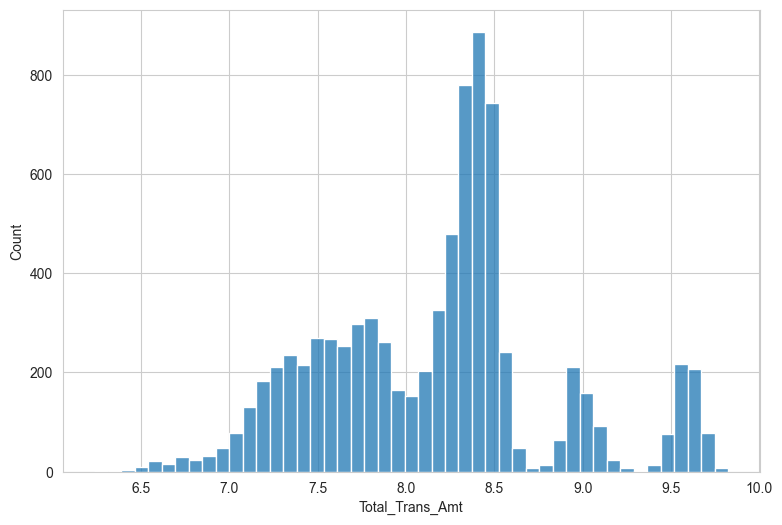

In [10]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(np.log(data['Total_Trans_Amt']))
plt.show()

In [11]:
data['ln_Total_Trans_Amt'] = np.log(data['Total_Trans_Amt'])
data_test['ln_Total_Trans_Amt'] = np.log(data_test['Total_Trans_Amt'])

The application of logarithm transformation could be beneficial in our analysis by potentially reducing variance.

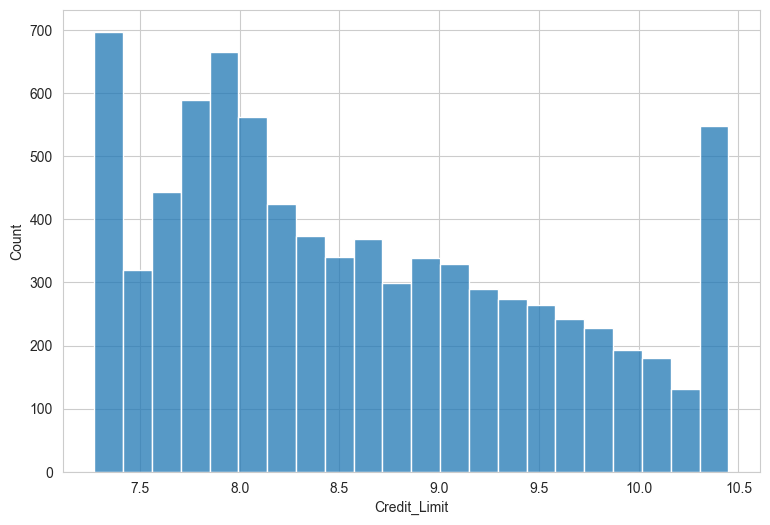

In [12]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(np.log(data['Credit_Limit']))
plt.show()

In [13]:
data['ln_Credit_Limit'] = np.log(data['Credit_Limit'])
data_test['ln_Credit_Limit'] = np.log(data_test['Credit_Limit'])

## Multi dimensional

### Average transaction

It may be worth to include into our analysis transformation of Total_Trans_Amt and Total_Trans_Ct

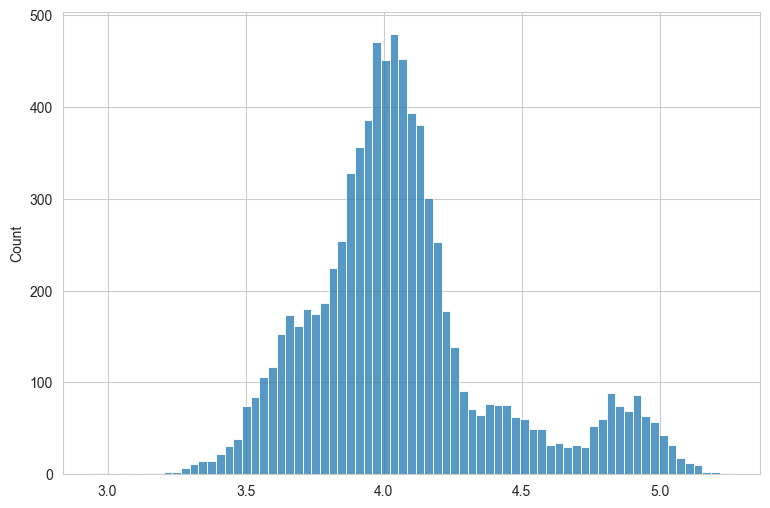

In [14]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(np.log(data['Total_Trans_Amt']/data['Total_Trans_Ct']))
plt.show()

In [15]:
data["ln_Avg_Transaction"] = np.log(data['Total_Trans_Amt']/data['Total_Trans_Ct'])
data_test["ln_Avg_Transaction"] = np.log(data_test['Total_Trans_Amt']/data_test['Total_Trans_Ct'])

### Account utilization

Additional interesting insight may be use of account calculated as total revolving balance / credit limit

While the card utilization rate is already part of our dataset, this additional feature has the potential to offer supplementary insights into the financial behavior and management of customer accounts. 

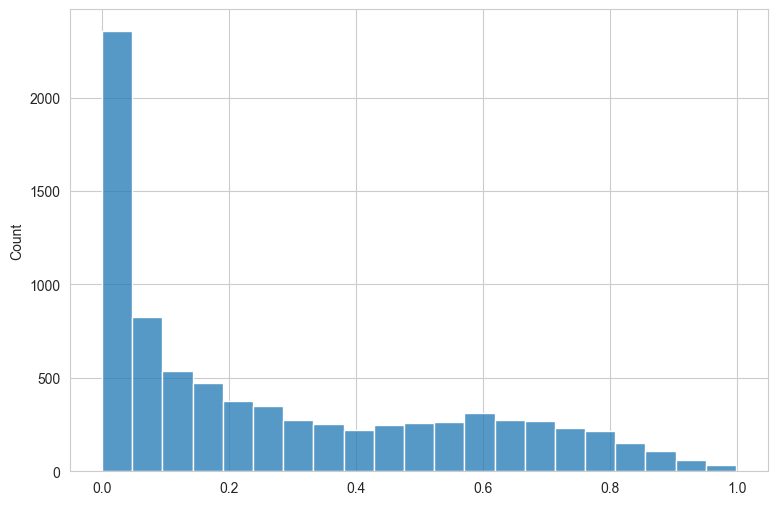

In [16]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(data['Total_Revolving_Bal']/data['Credit_Limit'])
plt.show()

In [17]:
data["Credit_utilization"] = data['Total_Revolving_Bal']/data['Credit_Limit']
data_test["Credit_utilization"] = data['Total_Revolving_Bal']/data['Credit_Limit']

# Feature Selection

Now after performing feature engineering we have more variables. Some of them will be highly correlated which may introduce multicolinearity to our models. In order to choose variables with highest predicting power we will need to conduct feature selection.

## Correlation

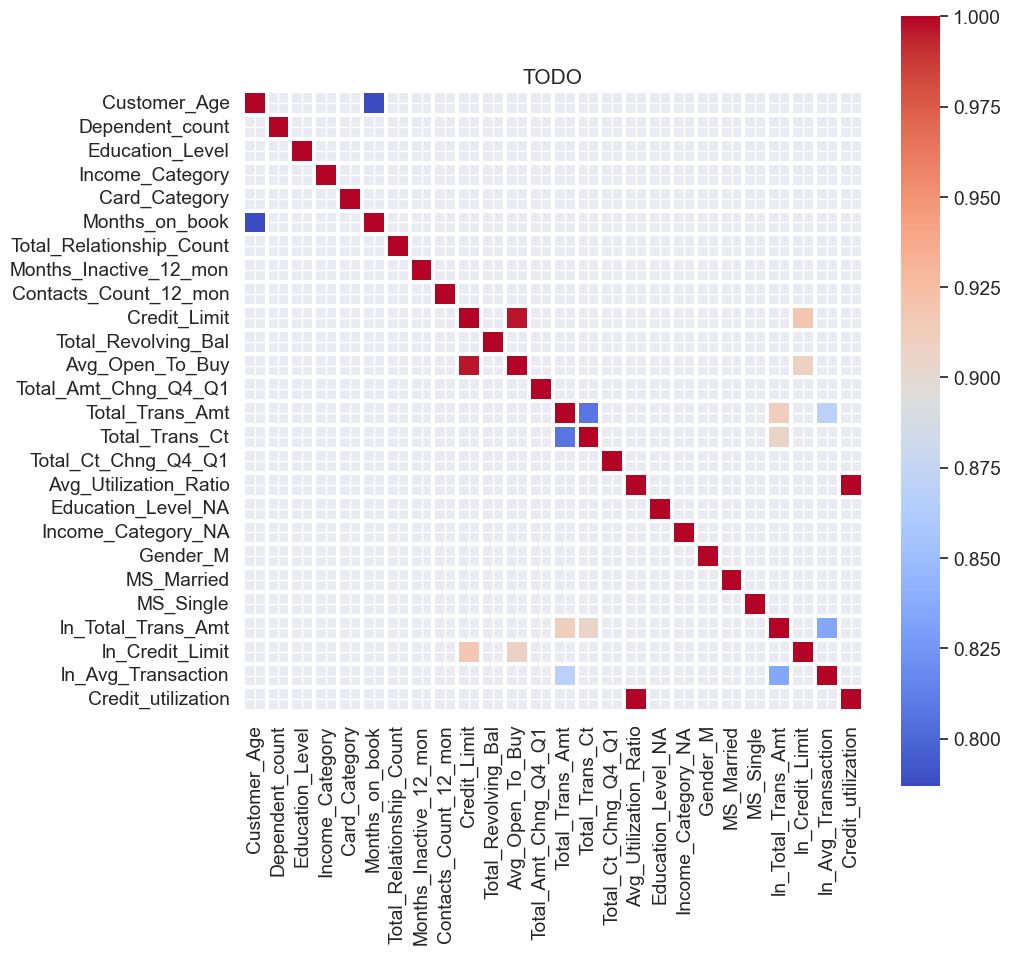

In [18]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.25)
sns.heatmap(
    data.corr()[(abs(data.corr())>0.7)],
    linewidths=1.5, annot=False, square=True, fmt=".2f", annot_kws={"size": 10},
    cmap = 'coolwarm'
)
plt.title("TODO")
plt.show()

In [19]:
data.corr()[(abs(data.corr())>0.7)].fillna("")

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_NA,Income_Category_NA,Gender_M,MS_Married,MS_Single,ln_Total_Trans_Amt,ln_Credit_Limit,ln_Avg_Transaction,Credit_utilization
Customer_Age,1.0,,,,,0.786791,,,,,,,,,,,,,,,,,,,,
Dependent_count,,1.0,,,,,,,,,,,,,,,,,,,,,,,,
Education_Level,,,1.0,,,,,,,,,,,,,,,,,,,,,,,
Income_Category,,,,1.0,,,,,,,,,,,,,,,,,,,,,,
Card_Category,,,,,1.0,,,,,,,,,,,,,,,,,,,,,
Months_on_book,0.786791,,,,,1.0,,,,,,,,,,,,,,,,,,,,
Total_Relationship_Count,,,,,,,1.0,,,,,,,,,,,,,,,,,,,
Months_Inactive_12_mon,,,,,,,,1.0,,,,,,,,,,,,,,,,,,
Contacts_Count_12_mon,,,,,,,,,1.0,,,,,,,,,,,,,,,,,
Credit_Limit,,,,,,,,,,1.0,,0.995995,,,,,,,,,,,,0.917895,,


As we can see now we have more variables with high correlation

## Variance Threshold

In [20]:
FE_columns = pd.DataFrame(data.var()).reset_index().rename(columns={'index':'Variable',0:"Variance"}).round(2)

Instead of using variance threshold we will be keeping variance value for further analysis.

In [21]:
FE_columns

,Variable,Variance
0,Customer_Age,64.11
1,Dependent_count,1.69
2,Education_Level,1.83
3,Income_Category,1.78
4,Card_Category,0.11
5,Months_on_book,63.90
6,Total_Relationship_Count,2.43
7,Months_Inactive_12_mon,1.02
8,Contacts_Count_12_mon,1.23
9,Credit_Limit,83066683.46


## Chi2

In [22]:
from sklearn.feature_selection import chi2

In [29]:
chi2(data,y_train)[0]

array([2.70518301e+00, 2.43085287e+00, 5.75825267e+00, 9.85448073e-01,
       4.06674478e-03, 1.55201905e+00, 1.07034192e+02, 8.35535879e+01,
       1.80411324e+02, 2.38950534e+04, 3.18001885e+05, 3.18042449e+03,
       9.59360204e+00, 5.97587878e+05, 9.44083399e+03, 5.35651466e+01,
       7.33371101e+01, 1.67814775e+00, 3.45198141e-01, 1.83725454e+00,
       1.30413035e-01, 1.59087046e-01, 2.17476601e+01, 1.33639079e+00,
       2.98807446e-02, 7.33306503e+01])

In [30]:
chi2(data,y_train)[1]

array([1.00022603e-01, 1.18968156e-01, 1.64113847e-02, 3.20857456e-01,
       9.49152543e-01, 2.12837621e-01, 4.37554863e-25, 6.20119908e-20,
       3.94105222e-41, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.95256525e-03, 0.00000000e+00, 0.00000000e+00, 2.50158275e-13,
       1.09293572e-17, 1.95170755e-01, 5.56844014e-01, 1.75273073e-01,
       7.18004173e-01, 6.89998445e-01, 3.10968906e-06, 2.47671463e-01,
       8.62761098e-01, 1.09651855e-17])

# SMOTE 